## Experiment 4e - Filters - Remez filter

Remez filter is a multiband filter, allowing us to define bands and their gains

In [1]:
import os, sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from directdemod import filters, constants
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

### Example

[0, 200000, 300000, 500000, 600000, 800000, 900000, 1000000] [1, 0, 5, 0.01]


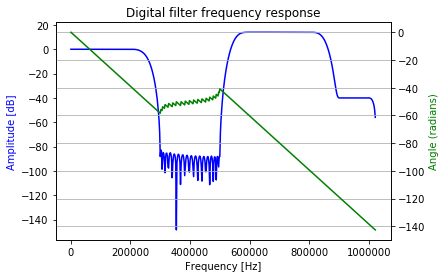

In [10]:
Fs = 2048000

bh = filters.remez(Fs, [[0, 200000], [300000, 500000], [600000, 800000], [900000, 1000000]], [1, 0, 5, 0.01])

w, h = signal.freqz(bh.getB, bh.getA)


w *= Fs/(2*np.pi) 

plt.clf() 
fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)

plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [Hz]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

## Conclusions

Remez band filter is very useful to get the desired band pass filtering in the shape that we want